In [2]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#data = nc.Dataset('/data/keeling/a/sf20/b/wrf_partmc/WRFV3/test/em_les/wrfout_d01_0001-01-01_00:00:00')
output_dir = '/data/nriemer/d/sf20/les_output/wrf-partmc/slurm-1826399'
data = nc.Dataset(output_dir + '/aerosols_d01_2023-06-21_09:00:00')
wrf_data = nc.Dataset(output_dir + '/wrfout_d01_2023-06-21_09:00:00')

In [50]:
data.variables.keys()

dict_keys(['Times', 'XLAT', 'XLONG', 'ZNU', 'ZNW', 'U', 'MU_U', 'V', 'MU_V', 'W', 'WW', 'RW', 'T', 'P', 'ALT', 'PB', 'DNW', 'DN', 'Z', 'Z_AT_W', 'MAPFAC_M', 'MAPFAC_U', 'MAPFAC_V', 'MAPFAC_MX', 'MAPFAC_MY', 'MAPFAC_UX', 'MAPFAC_UY', 'MAPFAC_VX', 'MF_VX_INV', 'MAPFAC_VY', 'TAUAER1', 'TAUAER2', 'TAUAER3', 'TAUAER4', 'GAER1', 'GAER2', 'GAER3', 'GAER4', 'WAER1', 'WAER2', 'WAER3', 'WAER4', 'h2so4', 'hno3', 'hcl', 'nh3', 'no', 'no2', 'no3', 'n2o5', 'hono', 'hno4', 'o3', 'o1d', 'O3P', 'oh', 'ho2', 'h2o2', 'co', 'so2', 'ch4', 'c2h6', 'ch3o2', 'ethp', 'hcho', 'ch3oh', 'ANOL', 'ch3ooh', 'ETHOOH', 'ald2', 'hcooh', 'RCOOH', 'c2o3', 'pan', 'aro1', 'aro2', 'alk1', 'ole1', 'api1', 'api2', 'lim1', 'lim2', 'par', 'AONE', 'mgly', 'eth', 'OLET', 'OLEI', 'tol', 'xyl', 'cres', 'to2', 'cro', 'open', 'onit', 'rooh', 'ro2', 'ano2', 'nap', 'xo2', 'xpar', 'isop', 'isoprd', 'isopp', 'isopn', 'isopo2', 'api', 'lim', 'dms', 'msa', 'dmso', 'dmso2', 'ch3so2h', 'ch3sch2oo', 'ch3so2', 'ch3so3', 'ch3so2oo', 'ch3so2ch2o

In [51]:
wrf_data.variables.keys()

dict_keys(['Times', 'XLAT', 'XLONG', 'LU_INDEX', 'ZNU', 'ZNW', 'ZS', 'DZS', 'VAR_SSO', 'U', 'V', 'W', 'PH', 'PHB', 'T', 'HFX_FORCE', 'LH_FORCE', 'TSK_FORCE', 'HFX_FORCE_TEND', 'LH_FORCE_TEND', 'TSK_FORCE_TEND', 'MU', 'MUB', 'NEST_POS', 'P', 'ALT', 'PB', 'FNM', 'FNP', 'RDNW', 'RDN', 'DNW', 'DN', 'CFN', 'CFN1', 'THIS_IS_AN_IDEAL_RUN', 'P_HYD', 'Q2', 'T2', 'TH2', 'PSFC', 'U10', 'V10', 'RDX', 'RDY', 'RESM', 'ZETATOP', 'CF1', 'CF2', 'CF3', 'ITIMESTEP', 'XTIME', 'QVAPOR', 'SHDMAX', 'SHDMIN', 'SNOALB', 'TSLB', 'SMOIS', 'SH2O', 'SEAICE', 'XICEM', 'SFROFF', 'UDROFF', 'IVGTYP', 'ISLTYP', 'VEGFRA', 'GRDFLX', 'ACGRDFLX', 'ACSNOM', 'SNOW', 'SNOWH', 'CANWAT', 'SSTSK', 'COSZEN', 'LAI', 'VAR', 'F', 'E', 'SINALPHA', 'COSALPHA', 'HGT', 'TSK', 'P_TOP', 'T00', 'P00', 'TLP', 'TISO', 'TLP_STRAT', 'P_STRAT', 'MAX_MSTFX', 'MAX_MSTFY', 'RAINC', 'RAINSH', 'RAINNC', 'SNOWNC', 'GRAUPELNC', 'HAILNC', 'CLDFRA', 'SWDOWN', 'GLW', 'SWNORM', 'OLR', 'XLAT_U', 'XLONG_U', 'XLAT_V', 'XLONG_V', 'ALBEDO', 'CLAT', 'ALBBCK', '

In [5]:
data['ccn_pr_010_a1']

<class 'netCDF4._netCDF4.Variable'>
float32 ccn_pr_010_a1(Time, bottom_top, south_north, west_east)
    FieldType: 104
    MemoryOrder: XYZ
    description: 010, total mass
    units: m^-3
    stagger: 
    coordinates: XLONG XLAT XTIME
unlimited dimensions: Time
current shape = (31, 100, 40, 40)
filling on, default _FillValue of 9.969209968386869e+36 used

In [4]:
x_dim = data.dimensions['west_east'].size
y_dim = data.dimensions['south_north'].size
z_dim = data.dimensions['bottom_top'].size

6644943400.0 3764962800.0
7088104400.0 3544242000.0
6641881600.0 2657769000.0


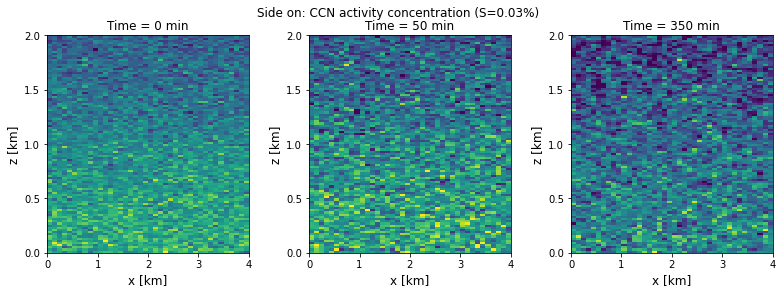

In [41]:
var = 'ccn_pr_003_a2'
#var = 'so2'
fig, axs =plt.subplots(1, 3, figsize=(13, 4))
#fig.suptitle(f'Side on {var.upper()}', fontsize=12)
fig.suptitle(f'Side on: CCN activity concentration (S=0.03%)', fontsize=12)

history_timestep = 5 # minutes between output
times = [0, 10, 70]
vmin, vmax= param_data_slice = data[var][0, :, :, 10].min(), data[var][0, :, :, 10].max()
for time, ax in zip(times, axs):
    param_data_slice = data[var][time, :, :, 10]
    #ax.contourf(param_data_slice)
    ax.pcolormesh(param_data_slice, vmin=vmin, vmax=vmax)
    print(param_data_slice.max(), param_data_slice.min())
    ax.set_title(f'Time = {history_timestep*time} min')
    ax.set_xlabel('x [km]', fontsize=12)
    ax.set_ylabel('z [km]', fontsize=12)
    ax.set_xticks(np.arange(0, x_dim+1, 10))
    ax.set_xticklabels(np.arange(0, 5, 1))
    ax.set_yticks(np.arange(0, z_dim+1, 25))
    ax.set_yticklabels(np.linspace(0, 2, 5).round(2))
plt.subplots_adjust(wspace=.3)

7600959500.0 3921056000.0
7599525400.0 3655900000.0
7311171000.0 3877001700.0


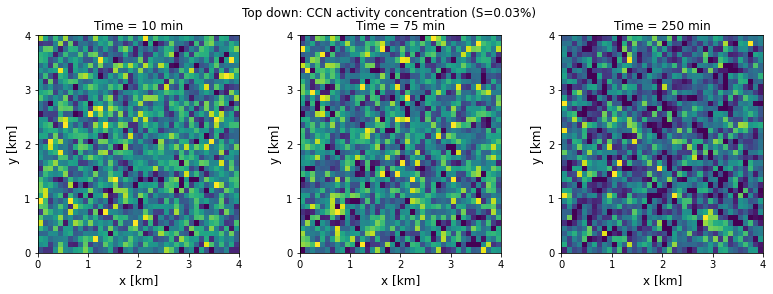

In [42]:
var = 'ccn_pr_003_a2'
#var = 'so2'
fig, axs =plt.subplots(1, 3, figsize=(13, 4))
#fig.suptitle(f'Top down {var.upper()}', fontsize=12)
fig.suptitle(f'Top down: CCN activity concentration (S=0.03%)', fontsize=12)
history_timestep = 5 # minutes between output
vmin, vmax= param_data_slice = data[var][0, 0, :, :].min(), data[var][0, 0, :, :].max()
times = [2, 15, 50]
for time, ax in zip(times, axs):
    param_data_slice = data[var][time, 0, :, :]
    ax.pcolormesh(param_data_slice, vmin=vmin, vmax=vmax)
    #ax.contourf(param_data_slice)
    print(param_data_slice.max(), param_data_slice.min())
    ax.set_title(f'Time = {history_timestep*time} min')
    ax.set_xlabel('x [km]', fontsize=12)
    ax.set_ylabel('y [km]', fontsize=12)
    ax.set_xticks(np.arange(0, x_dim+1, 10))
    ax.set_xticklabels(np.arange(0, 5, 1))
    ax.set_yticks(np.arange(0, y_dim+1, 10))
    ax.set_yticklabels(np.arange(0, 5, 1))
plt.subplots_adjust(wspace=.3)

In [17]:
mean_so2_profile = data['so2'][:, :50, :, :].mean(axis=2).mean(axis=2)


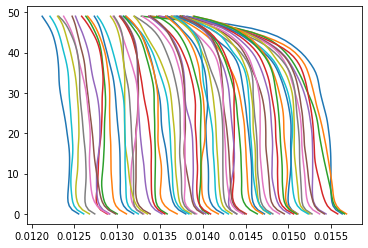

In [26]:
for i in range(mean_so2_profile.shape[0])[12:]:
    plt.plot(mean_so2_profile[i, :], np.arange(0, 50))

6759768000.0 4562855400.0
7599525400.0 3655900000.0
6717470700.0 3779089700.0


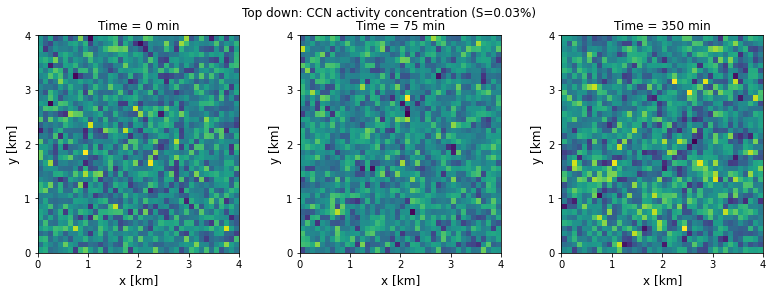

In [7]:
var = 'ccn_pr_003_a2'
#var = 'so2'
fig, axs =plt.subplots(1, 3, figsize=(13, 4))
#fig.suptitle(f'Top down {var.upper()}', fontsize=12)
fig.suptitle(f'Top down: CCN activity concentration (S=0.03%)', fontsize=12)
history_timestep = 5 # minutes between output

times = [0, 15, 70]
for time, ax in zip(times, axs):
    param_data_slice = data[var][time, 0, :, :]
    ax.pcolormesh(param_data_slice)
    #ax.contourf(param_data_slice)
    print(param_data_slice.max(), param_data_slice.min())
    ax.set_title(f'Time = {history_timestep*time} min')
    ax.set_xlabel('x [km]', fontsize=12)
    ax.set_ylabel('y [km]', fontsize=12)
    ax.set_xticks(np.arange(0, x_dim+1, 10))
    ax.set_xticklabels(np.arange(0, 5, 1))
    ax.set_yticks(np.arange(0, y_dim+1, 10))
    ax.set_yticklabels(np.arange(0, 5, 1))
plt.subplots_adjust(wspace=.3)

In [13]:
data['ccn_pr_003_a2'].shape

(73, 100, 40, 40)

In [15]:
mean_ccn_data.shape

(73, 50)

Text(0.5, 1.0, '')

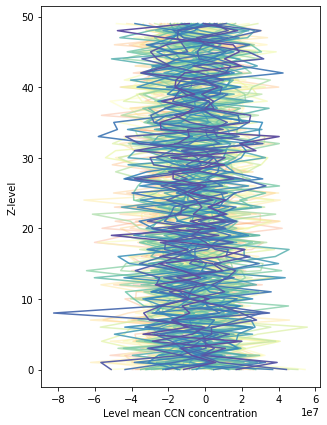

In [8]:
mean_ccn_data = data['ccn_pr_003_a2'][:, :50, :, :].mean(axis=2).mean(axis=2)
n_times = data['ccn_pr_003_a2'].shape[0]
colors = plt.cm.Spectral(np.linspace(0.15, 1, n_times))
fig, ax = plt.subplots(1,1, figsize=(5, 7))
for i in np.arange(n_times)[1:]:
    diff = mean_ccn_data[i, :] - mean_ccn_data[i-1, :]
    ax.plot(diff, np.arange(50), color=colors[i], zorder=i, alpha=1-.8*(n_times-i)/n_times)
#ax.plot(mean_ccn_data[0, :], np.arange(50), color='k', lw=2, ls='--')
ax.set_xlabel('Level mean CCN concentration')
ax.set_ylabel('Z-level')
ax.set_title('')

Text(0.5, 1.0, '')

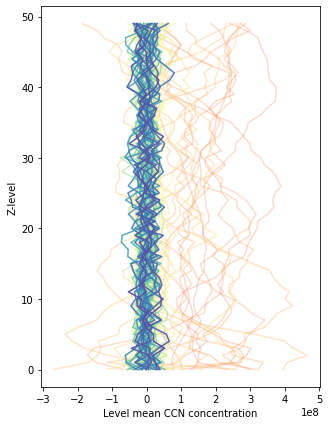

In [59]:
mean_ccn_data = data['ccn_pr_003_a2'][:, :50, 20:, 20:].mean(axis=2).mean(axis=2)
n_times = data['ccn_pr_003_a2'].shape[0]
colors = plt.cm.Spectral(np.linspace(0.15, 1, n_times))
fig, ax = plt.subplots(1,1, figsize=(5, 7))
for i in np.arange(n_times)[1:]:
    diff = mean_ccn_data[i, :] - mean_ccn_data[i-1, :]
    ax.plot(diff, np.arange(50), color=colors[i], zorder=i, alpha=1-.8*(n_times-i)/n_times)
#ax.plot(mean_ccn_data[0, :], np.arange(50), color='k', lw=2, ls='--')
ax.set_xlabel('Level mean CCN concentration')
ax.set_ylabel('Z-level')
ax.set_title('')

Takes about 150 minutes for the CCN profile to become uniform

Text(0.5, 1.0, '')

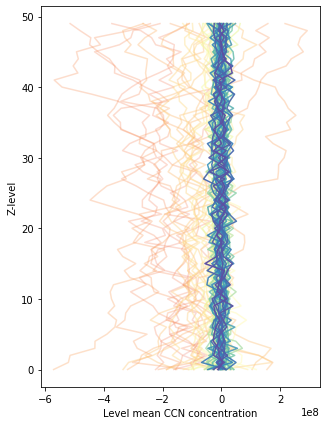

In [71]:
mean_ccn_data = data['ccn_pr_003_a2'][:, :50, :20, :20].mean(axis=2).mean(axis=2)
n_times = data['ccn_pr_003_a2'].shape[0]
colors = plt.cm.Spectral(np.linspace(0.15, 1, n_times))
fig, ax = plt.subplots(1,1, figsize=(5, 7))
for i in np.arange(n_times)[1:]:
    diff = mean_ccn_data[i, :] - mean_ccn_data[i-1, :]
    ax.plot(diff, np.arange(50), color=colors[i], zorder=i, alpha=1-.8*(n_times-i)/n_times)
#ax.plot(mean_ccn_data[0, :], np.arange(50), color='k', lw=2, ls='--')
ax.set_xlabel('Level mean CCN concentration')
ax.set_ylabel('Z-level')
ax.set_title('')

Text(0, 0.5, 'Integrated H$_2$SO$_4$ (ppmv)')

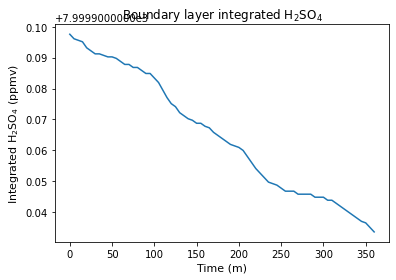

In [14]:
plt.title(f'Boundary layer integrated H$_2$SO$_4$')
plt.plot(np.arange(0, 361, 5), 1000*data['h2so4'][:, :50, :, :].data.sum(axis=1).sum(axis=1).sum(axis=1))
plt.xlabel('Time (m)', fontsize=11)
plt.ylabel('Integrated H$_2$SO$_4$ (ppmv)', fontsize=11)

In [20]:
data['h2so4'][:, :50, :, :].data.sum(axis=1).sum(axis=1).sum(axis=1)

array([1.4079007, 1.4079001, 1.4079001, 1.4079001, 1.4079001, 1.4079001,
       1.4079001, 1.4079   , 1.4079001, 1.4079   , 1.4079001, 1.4079001,
       1.4079   , 1.4079   , 1.4079   , 1.4079001, 1.4079   , 1.4079001,
       1.4079001, 1.4079   , 1.4079   , 1.4079001, 1.4079   , 1.4079001,
       1.4079001, 1.4079001, 1.4079001, 1.4079001, 1.4079001, 1.4079001,
       1.4079001], dtype=float32)

Text(0, 0.5, 'Integrated Sulfate')

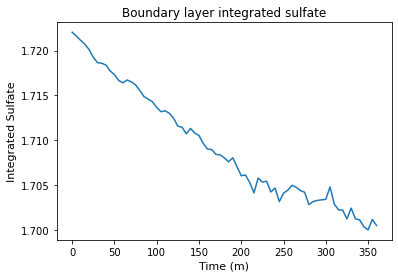

In [13]:
plt.title(f'Boundary layer integrated sulfate')
plt.plot(np.arange(0, 361, 5), 1000*data['pmc_SO4'][:, :50, :, :].data.sum(axis=1).sum(axis=1).sum(axis=1))
plt.xlabel('Time (m)', fontsize=11)
plt.ylabel('Integrated Sulfate', fontsize=11)

Time 0, Max: 0.00500000 ppbv, Min: 0.00500000 ppbv
Time 30, Max: 0.00500001 ppbv, Min: 0.00499997 ppbv
Time 60, Max: 0.00500001 ppbv, Min: 0.00499997 ppbv


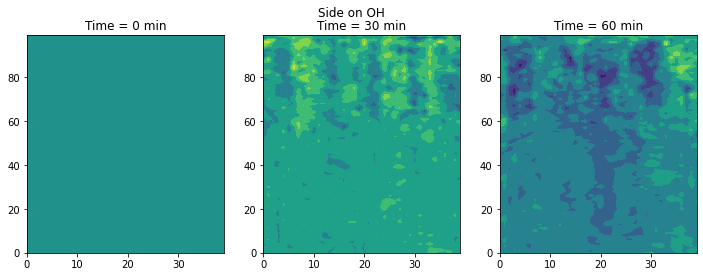

In [21]:
fig, axs =plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle('Side on OH', fontsize=12)

times = [0, 15, 30]
for time, ax in zip(times, axs):
    param_data_slice = 1000*data['oh'][time, :, :, 10]
    ax.contourf(param_data_slice)
    #ax.pcolormesh(param_data_slice)
    print(f'Time {2*time}, Max: {param_data_slice.max():3.8f} ppbv, Min: {param_data_slice.min():3.8f} ppbv')
    ax.set_title(f'Time = {2*time} min')

Time 0 Max 0.0050000004 ppbv Min 0.0050000004 ppbv
Time 30 Max 0.005000003 ppbv Min 0.0049999887 ppbv
Time 60 Max 0.005000001 ppbv Min 0.0049999864 ppbv


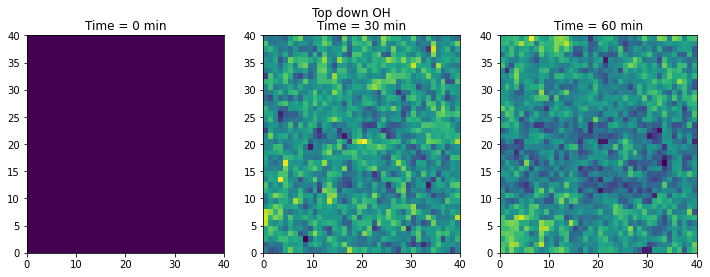

In [25]:
fig, axs =plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle('Top down OH', fontsize=12)
times = [0, 15, 30]
for time, ax in zip(times, axs):
    param_data_slice = 1000*data['oh'][time, 10, :, :]
    ax.pcolormesh(param_data_slice)
    #ax.contourf(param_data_slice)
    print('Time', 2*time, 'Max', param_data_slice.max(), 'ppbv Min', param_data_slice.min(), 'ppbv')
    ax.set_title(f'Time = {2*time} min')

In [4]:
output_dir = '/data/nriemer/d/sf20/les_output/wrf-partmc/slurm-1824151'
aero_dist = nc.Dataset(output_dir + '/aerosol_dist_d01_0001-01-01_00:00:00')


In [12]:
aero_dist.variables.keys()

dict_keys(['Times', 'num_a001', 'num_a002', 'num_a003', 'num_a004', 'num_a005', 'num_a006', 'num_a007', 'num_a008', 'num_a009', 'num_a010', 'num_a011', 'num_a012', 'num_a013', 'num_a014', 'num_a015', 'num_a016', 'num_a017', 'num_a018', 'num_a019', 'num_a020', 'num_a021', 'num_a022', 'num_a023', 'num_a024', 'num_a025', 'num_a026', 'num_a027', 'num_a028', 'num_a029', 'num_a030', 'num_a031', 'num_a032', 'num_a033', 'num_a034', 'num_a035', 'num_a036', 'num_a037', 'num_a038', 'num_a039', 'num_a040', 'num_a041', 'num_a042', 'num_a043', 'num_a044', 'num_a045', 'num_a046', 'num_a047', 'num_a048', 'num_a049', 'num_a050', 'num_a051', 'num_a052', 'num_a053', 'num_a054', 'num_a055', 'num_a056', 'num_a057', 'num_a058', 'num_a059', 'num_a060', 'num_a061', 'num_a062', 'num_a063', 'num_a064', 'num_a065', 'num_a066', 'num_a067', 'num_a068', 'num_a069', 'num_a070', 'num_a071', 'num_a072', 'num_a073', 'num_a074', 'num_a075', 'num_a076', 'num_a077', 'num_a078', 'num_a079', 'num_a080', 'num_a081', 'num_a08

Text(0.5, 0, 'Diameter [m]')

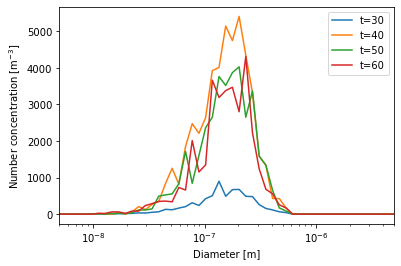

In [39]:
i = 20
j = 20
k = 25

for time in [15, 20, 25, 30]:
    x_vals = []
    bin_vals = []

    bin_edges = data['BIN_EDGES'][:].data[0]
    bin_width = bin_edges[1:] - bin_edges[:-1]

    for bin_idx in range(100):
        bin_idx += 1 # 1 indexing 
        bin_data = aero_dist[f'num_a{str(bin_idx).zfill(3)}'][time, k, j, i].data.item()/1e6
        bin_vals.append(bin_data)
        x_vals.append(bin_idx)

    plt.plot(data['BIN_CENTERS'][:].data[0], bin_vals, label=f't={2*time}')
    plt.xscale('log')
plt.xlim(5e-9, 5e-6)
plt.legend()
plt.ylabel('Number concentration [m$^{-3}$]')
plt.xlabel('Diameter [m]')

Text(0.5, 0, 'Mass [kg]')

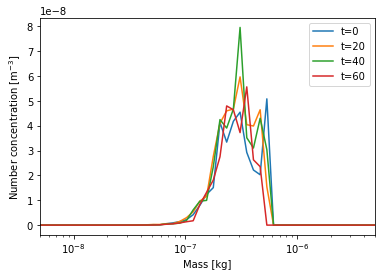

In [40]:
i = 10
j = 10
k = 1

for time in [0, 10, 20, 30]:
    x_vals = []
    bin_vals = []

    bin_edges = data['BIN_EDGES'][:].data[0]
    bin_width = bin_edges[1:] - bin_edges[:-1]

    for bin_idx in range(100):
        bin_idx += 1 # 1 indexing 
        bin_data = aero_dist[f'mass_a{str(bin_idx).zfill(3)}'][time, k, j, i].data.item()
        bin_vals.append(bin_data)
        x_vals.append(bin_idx)

    plt.plot(data['BIN_CENTERS'][:].data[0], bin_vals, label=f't={2*time}')
    plt.xscale('log')
plt.xlim(5e-9, 5e-6)
plt.legend()
plt.ylabel('Number concentration [m$^{-3}$]')
plt.xlabel('Mass [kg]')

In [124]:
def C(chem_t_step, t_chem, t_nonchem, io_t_step, t_io):
    n_chem=(3600/chem_t_step)
    n_io=(3600/io_t_step)
    return n_chem*t_chem + n_io*t_io + (3600 - n_chem  - n_io)*t_nonchem

def plotCostLine(chem_t_step, t_chem, t_nonchem,  io_t_step, t_io):
    cost = C(chem_t_step, t_chem, t_nonchem, io_t_step, t_io)

    plt.axhline(y=cost, xmin=0, xmax=1, ls='--', c='k')
    text = '$\Delta t_{chem}$ = ' + f'{chem_t_step:3.0f}, Compute time = {cost/3600:3.2f} hours'
    plt.text(x=.6, y=cost, s=text, c='k', verticalalignment='bottom', fontsize=11)
    plt.plot(chem_t_step, cost, marker='.', markersize=10, c='k')

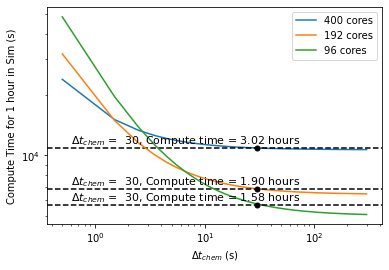

In [127]:
t_chem = 4.67
t_nonchem=2.84
io_t_step = 300
t_io = 40
# note: writing history takes about 5 seconds of wall time (2:30 over an hour long sim)
chem_t_step_vals = np.arange(.5, 300, 1)
c_vals = C(chem_t_step_vals, t_chem=t_chem, t_nonchem=t_nonchem,io_t_step=io_t_step, t_io=t_io)
plt.plot(chem_t_step_vals, c_vals, label='400 cores')

plotCostLine(chem_t_step=30, t_chem=4.67, t_nonchem=t_nonchem,io_t_step=io_t_step, t_io=t_io)
#plotCostLine(chem_t_step=5, t_chem=t_chem, t_nonchem=t_nonchem, phot_t_step=phot_t_step, t_phot=t_phot)
#plotCostLine(chem_t_step=10, t_chem=t_chem, t_nonchem=t_nonchem, phot_t_step=phot_t_step, t_phot=t_phot,io_t_step=io_t_step, t_io=t_io)
#plotCostLine(chem_t_step=30, t_chem=t_chem, t_nonchem=t_nonchem, phot_t_step=phot_t_step, t_phot=t_phot,io_t_step=io_t_step, t_io=t_io)
#plotCostLine(chem_t_step=60, t_chem=36, t_nonchem=2, phot_t_step=phot_t_step, t_phot=t_phot)
#plotCostLine(chem_t_step=300, t_chem=t_chem, t_nonchem=t_nonchem, phot_t_step=phot_t_step, t_phot=t_phot)

c_vals = C(chem_t_step_vals, t_chem=5.24, t_nonchem=1.7,io_t_step=io_t_step, t_io=26)
plt.plot(chem_t_step_vals, c_vals, label='192 cores')
plotCostLine(chem_t_step=30, t_chem=5.24, t_nonchem=1.7,io_t_step=io_t_step, t_io=26)


c_vals = C(chem_t_step_vals, t_chem=7.36, t_nonchem=1.3,io_t_step=io_t_step, t_io=30)
plt.plot(chem_t_step_vals, c_vals, label='96 cores')
plotCostLine(chem_t_step=30, t_chem=7.36, t_nonchem=1.3,io_t_step=io_t_step, t_io=26)


plt.yscale('log')
plt.xscale('log')
plt.ylabel('Compute Time for 1 hour in Sim (s)')
plt.xlabel('$\Delta t_{chem}$ (s)')
plt.legend()


In [24]:
import pandas as pd

In [133]:
#data_96 = pd.read_csv('/data/nriemer/d/sf20/les_output/wrf-partmc/slurm-1824044/timing.txt', header=None, delim_whitespace=True)
data_96 = pd.read_csv('/data/nriemer/d/sf20/les_output/wrf-partmc/slurm-1826145/timing.txt', header=None, delim_whitespace=True)
data_96 = data_96.iloc[:, 8]

In [134]:
#data_192 = pd.read_csv('/data/nriemer/d/sf20/les_output/wrf-partmc/slurm-1824151/timing.txt', header=None, delim_whitespace=True)
data_192 = pd.read_csv('/data/nriemer/d/sf20/les_output/wrf-partmc/slurm-1826143/timing.txt', header=None, delim_whitespace=True)

data_192 = data_192.iloc[:, 8]


In [135]:
#data_400 = pd.read_csv('/data/nriemer/d/sf20/les_output/wrf-partmc/slurm-1826043/timing.txt', header=None, delim_whitespace=True)
data_400 = pd.read_csv('/data/nriemer/d/sf20/les_output/wrf-partmc/slurm-1826136/timing.txt', header=None, delim_whitespace=True)

data_400 = data_400.iloc[:, 8]

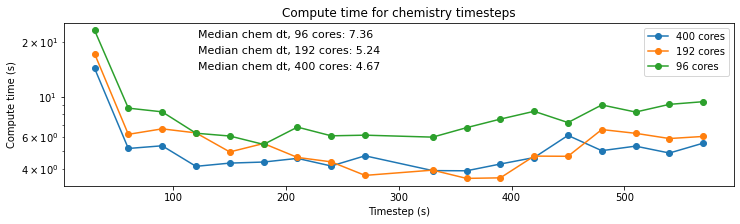

In [136]:
fig, ax = plt.subplots(1,1, figsize=(12, 3))
ax.plot(data_400[(data_400.index%30==0)&(data_400.index%300!=0)],label='400 cores', marker='o')
ax.plot(data_192[(data_192.index%30==0)&(data_192.index%300!=0)],label='192 cores',marker='o')
ax.plot(data_96[(data_96.index%30==0)&(data_96.index%300!=0)],label='96 cores',marker='o')
#ax.axhline(y=data_192[data_192.index%30==0].median(), xmin=0, xmax=1)
ax.text(x=.2, y=.9, 
        s=f'Median chem dt, 96 cores: {data_96[(data_96.index%30==0)&(data_96.index%300!=0)].median():3.2f}', 
        c='k', verticalalignment='bottom', fontsize=11, transform=ax.transAxes)
ax.text(x=.2, y=.8, 
        s=f'Median chem dt, 192 cores: {data_192[(data_192.index%30==0)&(data_192.index%300!=0)].median():3.2f}', 
        c='k', verticalalignment='bottom', fontsize=11, transform=ax.transAxes)

ax.text(x=.2, y=.7, 
        s=f'Median chem dt, 400 cores: {data_400[(data_96.index%30==0)&(data_96.index%300!=0)].median():3.2f}', 
        c='k', verticalalignment='bottom', fontsize=11, transform=ax.transAxes)

plt.legend()
plt.xlabel('Timestep (s)')
plt.ylabel('Compute time (s)')
plt.title('Compute time for chemistry timesteps')
plt.yscale('log')

Text(0, 0.5, 'Total compute time (s)')

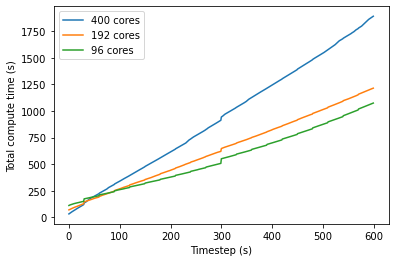

In [116]:
plt.plot(data_400.cumsum(),label='400 cores')
plt.plot(data_192.cumsum(),label='192 cores')
plt.plot(data_96.cumsum(),label='96 cores')
plt.legend()
plt.xlabel('Timestep (s)')
plt.ylabel('Total compute time (s)')

Text(0, 0.5, 'Compute time (s)')

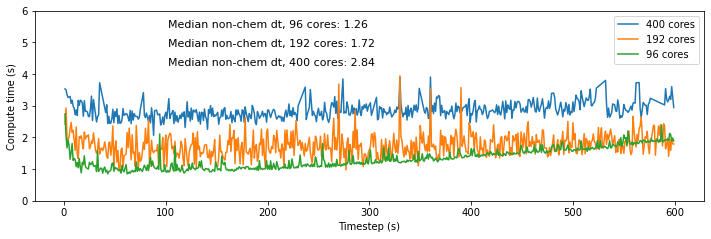

In [117]:
fig, ax = plt.subplots(1,1, figsize=(12, 3.5))

ax.plot(data_400[data_400<4], label='400 cores')
ax.plot(data_192[data_192<4], label='192 cores')
ax.plot(data_96[data_96<4], label='96 cores')

ax.text(x=.2, y=.9, 
        s=f'Median non-chem dt, 96 cores: {data_96[data_96.index%30!=0].median():3.2f}', 
        c='k', verticalalignment='bottom', fontsize=11, transform=ax.transAxes)
ax.text(x=.2, y=.8, 
        s=f'Median non-chem dt, 192 cores: {data_192[data_192.index%30!=0].median():3.2f}', 
        c='k', verticalalignment='bottom', fontsize=11, transform=ax.transAxes)

ax.text(x=.2, y=.7, 
        s=f'Median non-chem dt, 400 cores: {data_400[data_400.index%30!=0].median():3.2f}', 
        c='k', verticalalignment='bottom', fontsize=11, transform=ax.transAxes)

plt.ylim(0, 6)
plt.legend()
plt.xlabel('Timestep (s)')
plt.ylabel('Compute time (s)')